In [5]:
# Source:
# http://blog.nextgenetics.net/?e=102
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Relationship of War Outlook & Political Views
## Ryan Lovdahl
## December 7, 2019

- Will the U.S. will fight in a world war sometime in the next 10 years?

- How much can we learn about a person if we know his or her answer?

- What can we learn about the U.S. with 1,500 Americans' answers?

In [4]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

social_data = pd.read_csv("https://raw.githubusercontent.com/rjlovdahl/social_data/master/social_survey_final.csv")

# Count records by country

print(social_data[['ID']].groupby(social_data['USWARY']).agg(['count']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4820 entries, 0 to 4819
Columns: 419 entries, YEAR to USWARY
dtypes: float64(2), int64(417)
memory usage: 15.4 MB
          ID
       count
USWARY      
0       3258
1        786
2        695
8         80
9          1


## War responses compared to political views

- Let's look at the political viewpoints of two groups
- Data collected by the General Social Survey

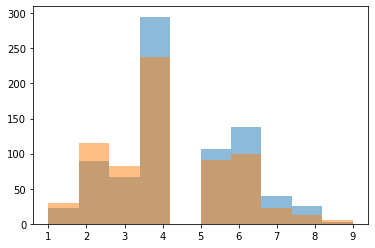

In [6]:
#split up the data set into the two groups we're comparing

ww_yes = social_data[(social_data['USWARY'] == 1)]
ww_no = social_data[(social_data['USWARY'] == 2)]

#plot the histogram charting political views
plt.hist(ww_yes['POLVIEWS'], alpha = .5)
plt.hist(ww_no['POLVIEWS'], alpha = .5)
plt.show()

- Blue expects world war; brown doesn't
- 1 = extremely liberal
- 7 = extremely conservative

## Is this a statistically significant difference?

- Yes

### With 95% confidence, the group expecting war is more conservative than the group that doesn't expect war.
- Difference is between 0.49 and 0.17 points 
- That's on a conservativeness spectrum of 1-7 (4 = moderate)
- Average political viewpoint for those who expect war is 4.38

In [0]:
#print the confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(ww_yes['POLVIEWS'], ww_no['POLVIEWS']))

#what is the average political viewpoint for folks who foresee a world war?
print(ww_yes["POLVIEWS"].mean())

The difference in means at the 95% confidence interval (two-tail) is between -0.494900430205754 and -0.16586073185696207.
4.377862595419847


### Full scale of responses
- 1: Extremely liberal
- 2: Liberal
- 3: Slightly liberal
- 4: Moderate
- 5: Slightly conservative
- 6: Conservative
- 7: Extremely conservative

### Implications
- Political messaging
- Military strategy
- Fluctuations in real risk of world war

### Open questions to explore
- Does war risk inform political views or the other way around?
- What other beliefs are correlated with perceived world war risk?
- Data available on salary, childhood residence state and much more
